<img src="../azul_horizontal_logo_upn.png" width="30%" />

In [ ]:
""" 

:Author: Jahir Lopez / Oscar Mendez
:Corporate: Universidad Pedagogica Nacional
:Date: 2019/06/01
:Maestria en tecnologias de la informacion aplicadas a la educación

"""

# SELECCIONANDO ATRIBUTOS

In [1340]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification

from sklearn import preprocessing

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.feature_selection import RFECV


from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

%matplotlib inline

### Dataset Artificial

In [1341]:
path = "/Users/oscarmendezaguirre/PycharmProjects/upn_tesis_m/"
filename = "data/NEW_SIMULATE_alban_data_procesada_2.csv"
fullpath = os.path.join(path, filename)
data_artificial = pd.read_csv(fullpath)

In [1342]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

In [1343]:
data_artificial.drop(
    [
        'MCPIO_RESIDE',
        'RESULTADO_4',
        'RESULTADO_2',
        'RESULTADO_3',
        
    ], 
    axis='columns', 
    inplace=True
)

In [1344]:
data_artificial.isnull().any().any()

False

In [1345]:
from IPython.display import display, HTML
display(HTML(data_artificial.notnull().apply(pd.Series.value_counts).to_html()))

In [771]:
# data_artificial.drop(
#     [
#         'DANE_RESIDE_DEPTO',
#         'DISCAPACIDAD',
#         'MCPIO_RESIDE',
#         'FECHA_NACIMIENTO',
#         'pp2',
#         'pp3',
#         'pp4',
        
#     ], 
#     axis='columns', 
#     inplace=True
# )

In [772]:
# data_artificial.drop(
#     [
#         'DEPTO_RESIDE',

        
#     ], 
#     axis='columns', 
#     inplace=True
# )

In [773]:
# data_artificial.drop(['H_COME_LECHE',
# 'H_COME_QUESO',
# 'H_COME_YOGURT',
# 'H_COME_CERDO',
# 'H_COME_POLLO',
# 'H_COME_RES',
# 'H_COME_HUEVO',
# 'H_COME_AVENA',
# 'H_COME_CEREAL',
# 'H_COME_FRIJOLES',
# 'H_COME_LENTEJAS'], 
#     axis='columns', 
#     inplace=True)

In [1221]:
data_artificial.shape

(2529, 67)

## Columna evaluacion - resultado

In [775]:
for index in data_artificial.index:
    if data_artificial.loc[index, 'pp1'] <= 0.65:
        data_artificial.loc[index,'RESULTADO'] = 'BAJO'
    elif data_artificial.loc[index, 'pp1'] > 0.65 and data_artificial.loc[index, 'pp1'] <= 0.78:
        data_artificial.loc[index,'RESULTADO'] = 'BASICO'
    elif data_artificial.loc[index, 'pp1'] > 0.78 and data_artificial.loc[index, 'pp1'] <= 0.9:
        data_artificial.loc[index,'RESULTADO'] = 'ALTO'
    elif data_artificial.loc[index, 'pp1'] > 0.9 and data_artificial.loc[index, 'pp1'] <= 5:
        data_artificial.loc[index,'RESULTADO'] = 'SUPERIOR'

In [1346]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

In [1347]:
for index in data_artificial.index:
    if data_artificial.loc[index, 'RESULTADO_1'] == 'SUPERIOR' or data_artificial.loc[index, 'RESULTADO_1'] == 'ALTO':
        data_artificial.loc[index,'RESULTADO'] = 'NO_RIESGO'
    elif data_artificial.loc[index, 'RESULTADO_1'] == 'BASICO' or data_artificial.loc[index, 'RESULTADO_1'] == 'BAJO':
        data_artificial.loc[index,'RESULTADO'] = 'RIESGO'

In [1348]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

In [1349]:
#Bar plots of categorical features
for feature in data_artificial.dtypes[data_artificial.dtypes == 'category'].index:
    sns.countplot(y=feature, data=data_artificial, order = data_artificial[feature].value_counts().index)
    plt.show()

## Convierte datos categoricos a numericos

In [1350]:
tipos = data_artificial.columns.to_series().groupby(data_artificial.dtypes).groups
categoricos = tipos[np.dtype('object')]

for categorico in categoricos:
    data_artificial[categorico], _ = pd.factorize(data_artificial[categorico])


In [1351]:
from IPython.display import display, HTML
display(HTML(data_artificial[4:10].to_html()))

## Variable Dependiente

In [1352]:
y = data_artificial['RESULTADO']

## Variables Independientes

In [1354]:
X = data_artificial.drop(['RESULTADO_1', 'RESULTADO'], axis='columns')

In [550]:
# X = data_artificial.drop(['pp1'], axis='columns')

In [1355]:
X.shape

(2529, 66)

In [1356]:
from IPython.display import display, HTML
display(HTML(X[4:10].to_html()))

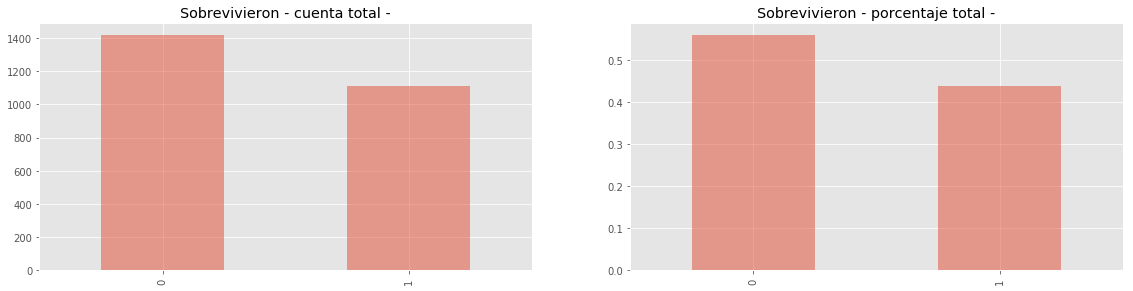

In [1360]:
fig = plt.figure(figsize=(30,10)) #creamos un canvas o figura de 30x10 pixeles

# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
data_artificial.RESULTADO.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - cuenta total -')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
plt.subplot2grid((2,3),(0,1))
data_artificial.RESULTADO.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - porcentaje total -')

plt.show()

In [1361]:
target = data_artificial['RESULTADO_1']

In [1362]:
#data_artificial.drop(['RESULTADO', 'pp1'], axis='columns', inplace=True)  

In [1363]:
feature_names = X.columns.values

In [1364]:
feature_names

array(['GENERO', 'GRADO', 'MUNICIP_NACE', 'SABER_3', 'SABER_5', 'SABER_9',
       'SIMULACROS', 'AREA_RESIDENCIA', 'NOMBRE_URBANO', 'NOMBRE_RURAL',
       'NIVEL_EDUCATIVO_PADRE', 'NIVEL_EDUCATIVO_MADRE', 'ESTRATO',
       'SISBEN', 'PERSONA_CONFORMA_HOGAR', 'NRO_HERMANAS', 'NRO_HERMANOS',
       'MATERIAL_PISOS', 'HABITACION_DUERME_HOGAR', 'HOGAR_INTERNET',
       'HOGAR_SERVICIO_TV', 'H_PC', 'H_LAVADORA', 'H_HORNO_MICROO',
       'H_HORNO_ELECT', 'H_HORNO_GAS', 'H_DVD', 'HOGAR_NEVERA',
       'H_HOGAR_CELULAR', 'H_PLAY', 'H_XBOX', 'H_NINTENDO', 'H_BICI',
       'H_CEL_PERS', 'H_MOTO', 'H_AUTO_PARTIC', 'H_AUTO_PUBLIC',
       'HOGAR_LIBROS', 'HOGAR_INGRESOS_MES', 'H_COME_LECHE',
       'H_COME_QUESO', 'H_COME_YOGURT', 'H_COME_CERDO', 'H_COME_POLLO',
       'H_COME_PAVO', 'H_COME_RES', 'H_COME_CORDERO', 'H_COME_CONEJO',
       'H_COME_PESCADO', 'H_COME_HUEVO', 'H_COME_AVENA', 'H_COME_CEREAL',
       'H_COME_ALMENDRAS', 'H_COME_MANI', 'H_COME_FRIJOLES',
       'H_COME_LENTEJAS', 'H_COME

In [1365]:
target_names =  np.array(['RESULTADO'], dtype=np.object)

In [1366]:
target_names

array(['RESULTADO'], dtype=object)

In [1367]:
type(feature_names)

numpy.ndarray

In [1368]:
type(target_names)

numpy.ndarray

# Random Forest selection features
* preparar el data set
* entrenar el clasificador random forest
* identificar los features mas importantes
* crear el nuevo dataset con los features seleccionados
* compar la exactitud de la seleccion


In [1369]:
feat_labels = X.columns.values

In [1370]:
feat_labels

array(['GENERO', 'GRADO', 'MUNICIP_NACE', 'SABER_3', 'SABER_5', 'SABER_9',
       'SIMULACROS', 'AREA_RESIDENCIA', 'NOMBRE_URBANO', 'NOMBRE_RURAL',
       'NIVEL_EDUCATIVO_PADRE', 'NIVEL_EDUCATIVO_MADRE', 'ESTRATO',
       'SISBEN', 'PERSONA_CONFORMA_HOGAR', 'NRO_HERMANAS', 'NRO_HERMANOS',
       'MATERIAL_PISOS', 'HABITACION_DUERME_HOGAR', 'HOGAR_INTERNET',
       'HOGAR_SERVICIO_TV', 'H_PC', 'H_LAVADORA', 'H_HORNO_MICROO',
       'H_HORNO_ELECT', 'H_HORNO_GAS', 'H_DVD', 'HOGAR_NEVERA',
       'H_HOGAR_CELULAR', 'H_PLAY', 'H_XBOX', 'H_NINTENDO', 'H_BICI',
       'H_CEL_PERS', 'H_MOTO', 'H_AUTO_PARTIC', 'H_AUTO_PUBLIC',
       'HOGAR_LIBROS', 'HOGAR_INGRESOS_MES', 'H_COME_LECHE',
       'H_COME_QUESO', 'H_COME_YOGURT', 'H_COME_CERDO', 'H_COME_POLLO',
       'H_COME_PAVO', 'H_COME_RES', 'H_COME_CORDERO', 'H_COME_CONEJO',
       'H_COME_PESCADO', 'H_COME_HUEVO', 'H_COME_AVENA', 'H_COME_CEREAL',
       'H_COME_ALMENDRAS', 'H_COME_MANI', 'H_COME_FRIJOLES',
       'H_COME_LENTEJAS', 'H_COME

In [1371]:
len(feat_labels)

66

In [1372]:
X[0:5]

GENERO  GRADO  MUNICIP_NACE  SABER_3  SABER_5  SABER_9  SIMULACROS  \
0       0      0             0     True     True     True        True   
1       1      0             0     True     True     True        True   
2       1      0             1     True     True     True        True   
3       0      0             0    False    False     True       False   
4       1      1             2     True     True     True       False   

   AREA_RESIDENCIA  NOMBRE_URBANO  NOMBRE_RURAL  ...  H_COME_GARBANZOS  \
0                0              0             0  ...                 0   
1                1              1             1  ...                 0   
2                1              2             1  ...                 1   
3                1              3             1  ...                 1   
4                1              0             2  ...                 1   

   LABOR_PADRE  LABOR_MADRE  LABOR_ACUDIENTE  SITUACIÓN_HOGAR  \
0            0            0                0                0   
1            1            1                1                0   
2            2            2                2                0   
3            2            3                3                0   
4            3            2                2                1   

   TIEMPO_DEDICA_LEER  TIEMPO_DEDICA_NAVEGAR  TRABAJO_SEMANA_PAST  EDAD  \
0                 0.5                    3.0                  6.0     9   
1                 1.0                    3.0                  7.0    18   
2                 1.0                    3.0                  0.0     6   
3                 0.5                    3.0                  2.5    16   
4                 1.0                    5.0                  0.0    10   

   REMUNERACION_DIA  
0                 0  
1                 1  
2                 2  
3                 2  
4                 2  

[5 rows x 66 columns]

In [1373]:
y[:5]

0    0
1    0
2    0
3    1
4    1
Name: RESULTADO, dtype: int64

In [1374]:
# seleccionamos el 40% de la muestra para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1375]:
X_train.shape

(2023, 66)

## Optimiacion de parametros para el clasificador

In [1249]:
# Create a dictionary containing all the candidate values of the parameters
parameter_grid = dict(n_estimators=list(range(1, 5001, 1000)),
                      criterion=['gini','entropy'],
                      max_features=list(range(1, len(feature_names), 2)),
                      max_depth= [None] + list(range(5, 25, 1)))

In [1250]:
# Creata a random forest object
random_forest = RandomForestClassifier(random_state=0, n_jobs=2)

In [571]:
# Create a gridsearch object with 5-fold cross validation, and uses all cores (n_jobs=-1)
# clf = GridSearchCV(estimator=random_forest, param_grid=parameter_grid, cv=5, verbose=1, n_jobs=2)

In [572]:
# Nest the gridsearchCV in a 3-fold CV for model evaluation
# cv_scores = cross_val_score(clf, X_train, y_train)

In [1251]:
# Print results
print('Accuracy scores:', cv_scores)
print('Mean of score:', np.mean(cv_scores))
print('Variance of scores:', np.var(cv_scores))

Accuracy scores: [0.55081967 0.52145215 0.5049505  0.52145215 0.53135314]
Mean of score: 0.5260055185846453
Variance of scores: 0.0002258239310138547


In [1376]:
# creamos el clasificador
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# entrenamos el clasificador
model = clf.fit(X_train, y_train)

# imprimimos el listado de importancia para la seleccion
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('GENERO', 0.006174428658109179)
('GRADO', 0.01696373900621619)
('MUNICIP_NACE', 0.018140308868838544)
('SABER_3', 0.005547209974546618)
('SABER_5', 0.005836809867243484)
('SABER_9', 0.005602254351583907)
('SIMULACROS', 0.0056566480903946096)
('AREA_RESIDENCIA', 0.0059957354708187315)
('NOMBRE_URBANO', 0.013235672827258167)
('NOMBRE_RURAL', 0.021655195404984045)
('NIVEL_EDUCATIVO_PADRE', 0.01788057838560351)
('NIVEL_EDUCATIVO_MADRE', 0.018803346823958286)
('ESTRATO', 0.008632537212952894)
('SISBEN', 0.04057914210702883)
('PERSONA_CONFORMA_HOGAR', 0.041304921149855164)
('NRO_HERMANAS', 0.039875305858859046)
('NRO_HERMANOS', 0.04262256257879031)
('MATERIAL_PISOS', 0.010132642391932602)
('HABITACION_DUERME_HOGAR', 0.03932597385567851)
('HOGAR_INTERNET', 0.005455961034594365)
('HOGAR_SERVICIO_TV', 0.0059033166638351505)
('H_PC', 0.005833274873307466)
('H_LAVADORA', 0.0055489653634924925)
('H_HORNO_MICROO', 0.005857779286941657)
('H_HORNO_ELECT', 0.0005354647447541873)
('H_HORNO_GAS', 0.006

In [576]:
#model.predict

In [1377]:
importances = model.feature_importances_
# feature_importance = list(importances)

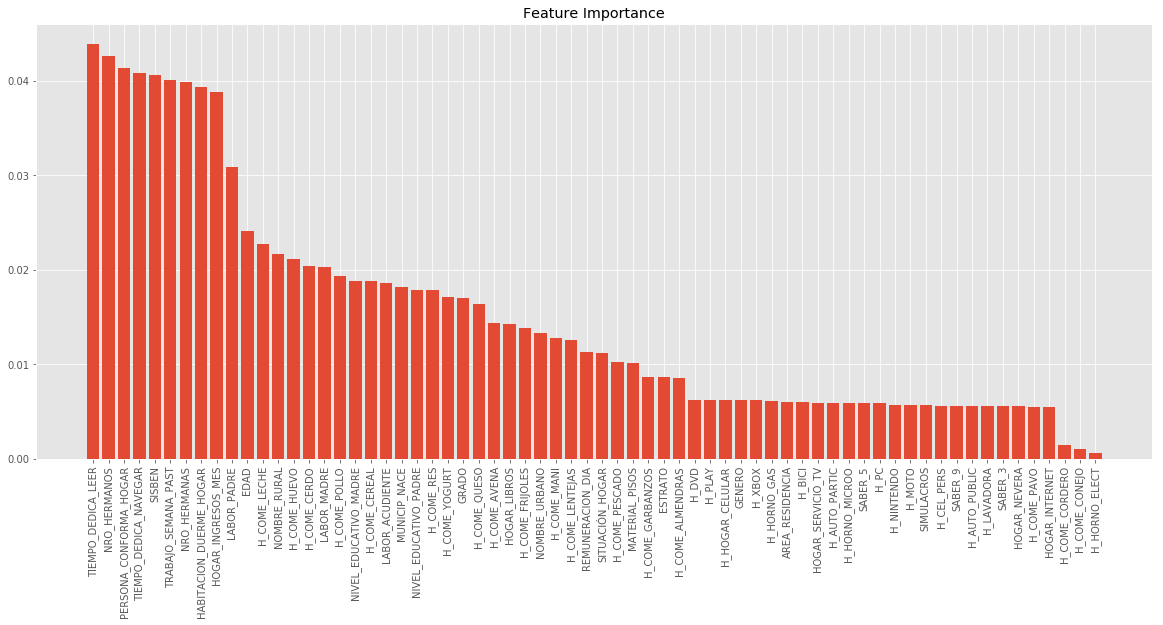

In [1378]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(20,8))

# # Create plot title
plt.title("Feature Importance")
# # Add bars
plt.bar(range(X.shape[1]), importances[indices])

# # Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# # Show plot
plt.show()


In [1379]:
# creamos un selector que use los features que tengan una importancia superior a 0.01, la suma totas es del 100%
sfm = SelectFromModel(clf, threshold=0.01)
# Entrenamos el selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.01)

In [1380]:
importances = list(model.feature_importances_)
feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances];

Variable: SISBEN               Importancia: 0.04
Variable: PERSONA_CONFORMA_HOGAR Importancia: 0.04
Variable: NRO_HERMANAS         Importancia: 0.04
Variable: NRO_HERMANOS         Importancia: 0.04
Variable: HABITACION_DUERME_HOGAR Importancia: 0.04
Variable: HOGAR_INGRESOS_MES   Importancia: 0.04
Variable: TIEMPO_DEDICA_LEER   Importancia: 0.04
Variable: TIEMPO_DEDICA_NAVEGAR Importancia: 0.04
Variable: TRABAJO_SEMANA_PAST  Importancia: 0.04
Variable: LABOR_PADRE          Importancia: 0.03
Variable: GRADO                Importancia: 0.02
Variable: MUNICIP_NACE         Importancia: 0.02
Variable: NOMBRE_RURAL         Importancia: 0.02
Variable: NIVEL_EDUCATIVO_PADRE Importancia: 0.02
Variable: NIVEL_EDUCATIVO_MADRE Importancia: 0.02
Variable: H_COME_LECHE         Importancia: 0.02
Variable: H_COME_QUESO         Importancia: 0.02
Variable: H_COME_YOGURT        Importancia: 0.02
Variable: H_COME_CERDO         Importancia: 0.02
Variable: H_COME_POLLO         Importancia: 0.02
Variable: H_

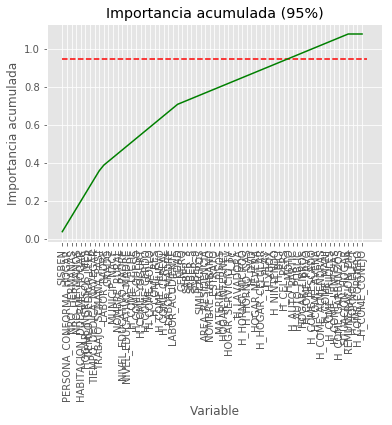

In [1381]:

x_values = list(range(len(importances)))
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances, 'g-')

plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

plt.xticks(x_values, sorted_features, rotation = 'vertical')

plt.xlabel('Variable'); plt.ylabel('Importancia acumulada'); plt.title('Importancia acumulada (95%)');

In [1382]:
sfm.get_support(indices=True)

array([ 1,  2,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 37, 38, 39, 40, 41,
       42, 43, 45, 48, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63,
       64, 65])

In [1383]:
# Imprimimos los features mas importantes seleccionados
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

GRADO
MUNICIP_NACE
NOMBRE_URBANO
NOMBRE_RURAL
NIVEL_EDUCATIVO_PADRE
NIVEL_EDUCATIVO_MADRE
SISBEN
PERSONA_CONFORMA_HOGAR
NRO_HERMANAS
NRO_HERMANOS
MATERIAL_PISOS
HABITACION_DUERME_HOGAR
HOGAR_LIBROS
HOGAR_INGRESOS_MES
H_COME_LECHE
H_COME_QUESO
H_COME_YOGURT
H_COME_CERDO
H_COME_POLLO
H_COME_RES
H_COME_PESCADO
H_COME_HUEVO
H_COME_AVENA
H_COME_CEREAL
H_COME_MANI
H_COME_FRIJOLES
H_COME_LENTEJAS
LABOR_PADRE
LABOR_MADRE
LABOR_ACUDIENTE
SITUACIÓN_HOGAR
TIEMPO_DEDICA_LEER
TIEMPO_DEDICA_NAVEGAR
TRABAJO_SEMANA_PAST
EDAD
REMUNERACION_DIA


## Creamos un subset de datos

In [1271]:
# transformamos los datos para crear un nuevo dataset con las caracteristicas mas importantes, se hace para X, y
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [1386]:
print(sfm.transform(X_train))

[[3 0 0 ... 2.52 15 2]
 [4 0 0 ... 0.51 14 2]
 [0 0 7 ... 1.16 12 2]
 ...
 [0 12 0 ... 3.83 14 2]
 [2 5 0 ... 3.84 16 2]
 [0 0 0 ... 0.83 12 2]]


In [1272]:
X_important_train.shape

(2023, 36)

In [1275]:
X_important_test.shape

(506, 36)

In [1384]:
from IPython.display import display, HTML
display(HTML(X_train[4:10].to_html()))

In [1277]:
X_important_train.shape

(2023, 36)

In [1278]:
X_train.shape

(2023, 66)

In [1279]:
data_artificial.head()

GENERO  GRADO  MUNICIP_NACE  SABER_3  SABER_5  SABER_9  SIMULACROS  \
0       0      0             0     True     True     True        True   
1       1      0             0     True     True     True        True   
2       1      0             1     True     True     True        True   
3       0      0             0    False    False     True       False   
4       1      1             2     True     True     True       False   

   AREA_RESIDENCIA  NOMBRE_URBANO  NOMBRE_RURAL  ...  LABOR_MADRE  \
0                0              0             0  ...            0   
1                1              1             1  ...            1   
2                1              2             1  ...            2   
3                1              3             1  ...            3   
4                1              0             2  ...            2   

   LABOR_ACUDIENTE  SITUACIÓN_HOGAR  TIEMPO_DEDICA_LEER  \
0                0                0                 0.5   
1                1                0                 1.0   
2                2                0                 1.0   
3                3                0                 0.5   
4                2                1                 1.0   

   TIEMPO_DEDICA_NAVEGAR  TRABAJO_SEMANA_PAST  EDAD  REMUNERACION_DIA  \
0                    3.0                  6.0     9                 0   
1                    3.0                  7.0    18                 1   
2                    3.0                  0.0     6                 2   
3                    3.0                  2.5    16                 2   
4                    5.0                  0.0    10                 2   

   RESULTADO_1  RESULTADO  
0            0          0  
1            0          0  
2            0          0  
3            1          1  
4            2          1  

[5 rows x 68 columns]

In [1280]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [1281]:
logit = LogisticRegression()

In [1282]:
cross_val_score(logit, X, y, scoring="accuracy")

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWa

array([0.56042654, 0.5599051 , 0.56057007])

In [1283]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets



In [1284]:
XX = StandardScaler().fit_transform(X)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1285]:
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(XX)

In [1286]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 66
Reduced number of features: 65


In [1287]:
X_pca

array([[ 0.67783701, -1.15881939, -1.81634164, ..., -0.81404846,
         1.89727037, -1.02203605],
       [-0.08011338, -0.55337532,  0.94977423, ..., -1.5000721 ,
         0.03290874, -0.77290633],
       [ 1.00292309, -1.19863799,  0.23476398, ..., -1.01031731,
         1.58301585,  0.21962769],
       ...,
       [-0.76347658,  0.3286884 , -0.7661486 , ...,  0.26520262,
         0.80072592,  0.45763009],
       [-0.92848511,  0.56228173,  0.6319679 , ...,  1.26397096,
         0.79868873,  0.19899316],
       [-1.19374147,  0.93910735,  0.05789533, ...,  0.35371422,
        -0.14997746, -0.39948466]])

In [1288]:
import numpy as np
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import datasets, svm
import matplotlib.pyplot as plt

In [1289]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X, y)   

NameError: name 'parameter_candidates' is not defined

In [1067]:
X.shape

(2529, 66)

In [ ]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [1290]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [1291]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [1292]:
# Create k-Fold cross-validation
kf = KFold(n_splits=2, shuffle=True, random_state=1)

In [1293]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X_important_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [1294]:
# Calculate mean
cv_results.mean()

0.5185396410238367

In [1295]:
X_important_train.shape

(2023, 36)

In [1168]:
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

In [1296]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
import seaborn



In [1297]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
X_std = standardizer.fit_transform(X)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1298]:
# Fit a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean', n_jobs=-1).fit(X_std, y)

In [1299]:
# Create a pipeline
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

# Create space of candidate values
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [1300]:
# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_important_train, y_train)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/oscarmendezaguirr

In [1301]:
# Best neighborhood size (k)
clf.best_estimator_.get_params()['knn__n_neighbors']

2

In [1302]:
# Best neighborhood size (k)
clf.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardizer',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
              metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
              weights='uniform'))],
 'standardizer': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
            metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
            weights='uniform'),
 'standardizer__copy': True,
 'standardizer__with_mean': True,
 'standardizer__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [1303]:
X_important_train.shape

(2023, 36)

In [1304]:
clf = neighbors.KNeighborsClassifier(n_neighbors=2, algorithm='auto', p=2, weights = 'uniform', metric='euclidean')
trained_model = clf.fit(X_important_train, y_train)

In [1305]:
trained_model.score(X_important_test, y_test)


0.5296442687747036

In [1306]:
predKN = trained_model.predict(X_important_test)
print(confusion_matrix(y_test, predKN))
print(classification_report(y_test, predKN))
print(metrics.accuracy_score(y_test, predKN))

[[225  52]
 [186  43]]
              precision    recall  f1-score   support

           0       0.55      0.81      0.65       277
           1       0.45      0.19      0.27       229

   micro avg       0.53      0.53      0.53       506
   macro avg       0.50      0.50      0.46       506
weighted avg       0.50      0.53      0.48       506

0.5296442687747036


## weights = 'uniform'

In [1307]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')
# Fit the classifier to the data
knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1308]:
knn.predict(X_test)[0:20]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [1309]:
knn.score(X_test, y_test)

0.741106719367589

In [1310]:
knn = trained_model.predict(X_important_test)
print(confusion_matrix(y_test, knn))
print(classification_report(y_test, knn))
print(metrics.accuracy_score(y_test, knn))

[[225  52]
 [186  43]]
              precision    recall  f1-score   support

           0       0.55      0.81      0.65       277
           1       0.45      0.19      0.27       229

   micro avg       0.53      0.53      0.53       506
   macro avg       0.50      0.50      0.46       506
weighted avg       0.50      0.53      0.48       506

0.5296442687747036


In [1311]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0) 

In [1312]:
from sklearn.model_selection import validation_curve

In [1313]:
param_range = np.logspace(-6, -1, 5)

In [1314]:
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

In [1315]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

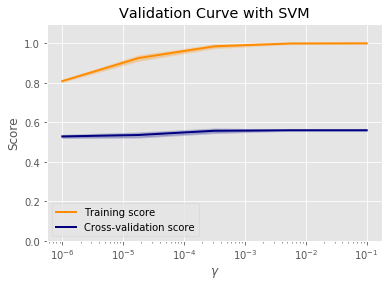

In [1316]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [1317]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_important_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_important_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_important_test, y_test) 

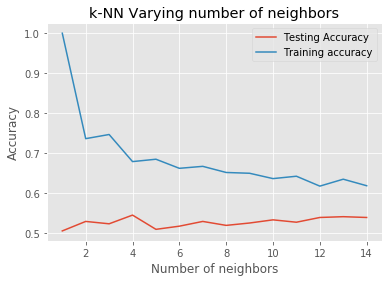

In [1318]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

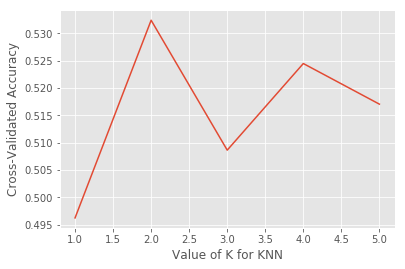

In [1319]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 6)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_important_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

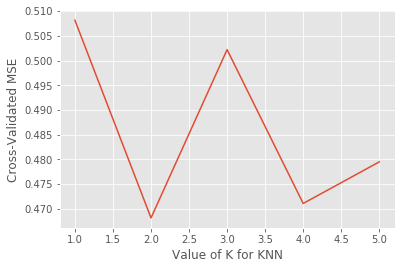

In [1320]:
import matplotlib.pyplot as plt
k_range = range(1, 6)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X_important_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [1321]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [1322]:
from sklearn.metrics import roc_curve
a=y_test.to_numpy()
len(a[:489])

489

In [1323]:
fpr, tpr, thresholds = roc_curve(a[:489], y_pred_proba)

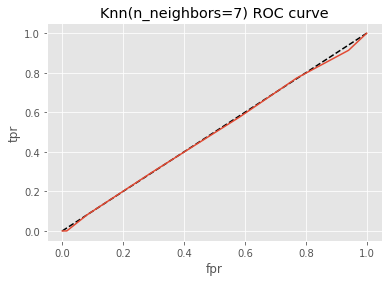

In [1324]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [1325]:
roc_tales = metrics.auc(fpr, tpr)
roc_tales

0.49580094626563037

# KNN

In [1326]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=12)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_important_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.55555556 0.54567901 0.54320988 0.52227723 0.53217822]
cv_scores mean:0.5397799779977998


In [1327]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [637]:
knn.predict(X[1:20])

array([0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0])

# RANDOM FOREST

In [1388]:
# Crear el modelo con 100 arboles
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True, verbose=2,
                               max_features = 'sqrt')


In [1389]:
# a entrenar!
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [1391]:
predR = model.predict(X_test)
print(confusion_matrix(y_test, predR))
print(classification_report(y_test, predR))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[[249  28]
 [193  36]]
              precision    recall  f1-score   support

           0       0.56      0.90      0.69       277
           1       0.56      0.16      0.25       229

   micro avg       0.56      0.56      0.56       506
   macro avg       0.56      0.53      0.47       506
weighted avg       0.56      0.56      0.49       506



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


In [1392]:
# verificamos la presicion con los features seleccionados
accuracy_score(y_test, predR)

0.5632411067193676

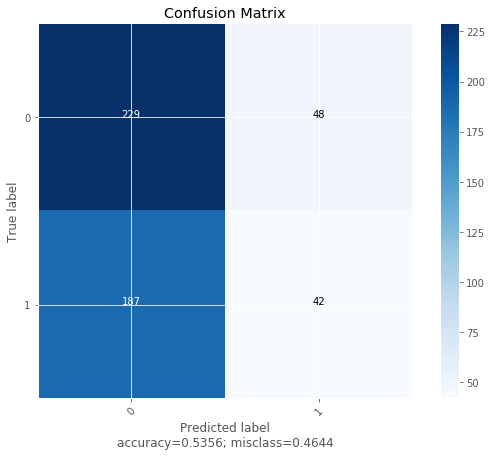

In [1339]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_test, predR)),
                     normalize    = False,
                     target_names = ['0', '1'],
                     title        = "Confusion Matrix")

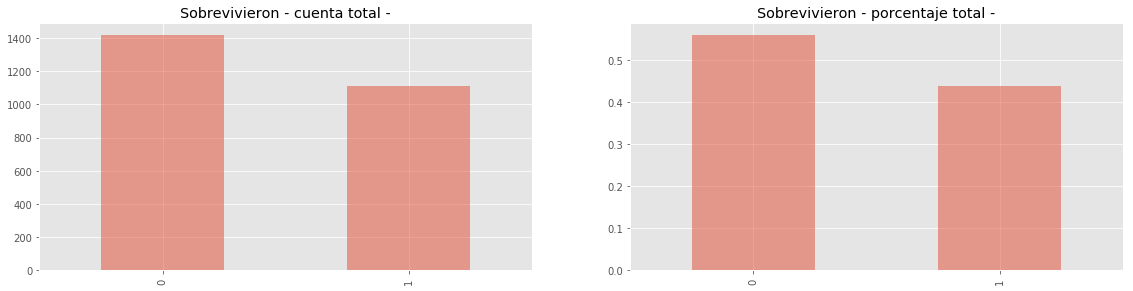

In [1332]:
fig = plt.figure(figsize=(30,10)) #creamos un canvas o figura de 30x10 pixeles

# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
data_artificial.RESULTADO.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - cuenta total -')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
plt.subplot2grid((2,3),(0,1))
data_artificial.RESULTADO.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - porcentaje total -')

plt.show()

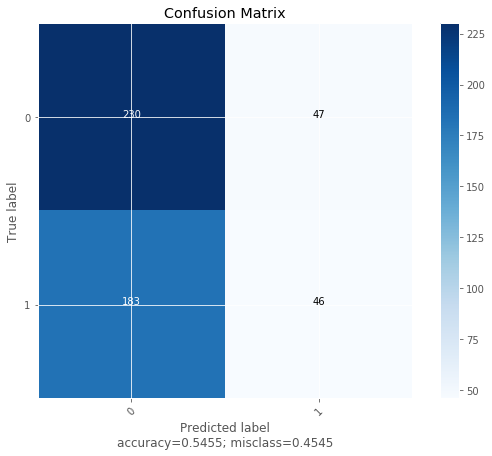

In [1333]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_test, predR)),
                     normalize    = False,
                     target_names = ['0', '1'],
                     title        = "Confusion Matrix")

In [1209]:
from sklearn.metrics import confusion_matrix
import numpy as np


def plot_confusion_matrix(cm,
                         target_names,
                         title='Confusion matrix',
                         cmap=None,
                         normalize=True):
   import matplotlib.pyplot as plt
   import numpy as np
   import itertools

   accuracy = np.trace(cm) / float(np.sum(cm))
   misclass = 1 - accuracy

   if cmap is None:
       cmap = plt.get_cmap('Blues')

   plt.figure(figsize=(8, 6))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()

   if target_names is not None:
       tick_marks = np.arange(len(target_names))
       plt.xticks(tick_marks, target_names, rotation=45)
       plt.yticks(tick_marks, target_names)

   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


   thresh = cm.max() / 1.5 if normalize else cm.max() / 2
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       if normalize:
           plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
       else:
           plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
   plt.show()

In [1127]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

In [1128]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_important_train)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1129]:
# Create support vector classifier
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# Train model
model = svc.fit(X_std, y_train)

In [1130]:
model.score(X_std, y_train)

0.5655899802241265

In [1131]:
predSvm = model.predict(X_important_test)
print(confusion_matrix(y_test, predSvm))
print(classification_report(y_test, predSvm))

[[566   0]
 [446   0]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       566
           1       0.00      0.00      0.00       446

   micro avg       0.56      0.56      0.56      1012
   macro avg       0.28      0.50      0.36      1012
weighted avg       0.31      0.56      0.40      1012



/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1132]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [1133]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5563241106719368


In [1134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

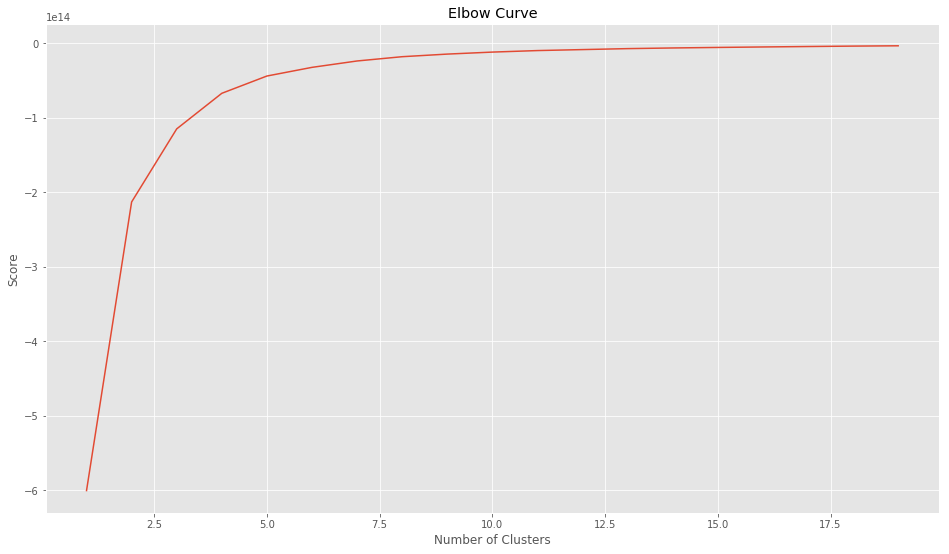

In [1135]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [1136]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.39820022e-01  2.58942632e+00  5.72440945e+00  5.03937008e-01
   5.35433071e-01  4.85939258e-01  4.42069741e-01  3.89201350e-01
   1.64904387e+00  5.72890889e+00  2.52193476e+00  2.39370079e+00
   6.14173228e-01  3.37599100e+01  4.38512936e+00  1.67061867e+00
   1.51854893e+00  7.08661417e-01  2.61398200e+00  4.93813273e-01
   4.81439820e-01  5.17435321e-01  5.34308211e-01  4.78065242e-01
   7.87401575e-03  4.64566929e-01  5.43307087e-01  5.39932508e-01
   4.63442070e-01  4.25196850e-01  4.94938133e-01  4.53318335e-01
   5.01687289e-01  5.65804274e-01  4.67941507e-01  5.01687289e-01
   4.27446569e-01  1.48031496e+00  9.00738821e+05  3.76490439e+00
   1.55568054e+00  1.57142857e+00  2.87176603e+00  2.38470191e+00
   1.50731159e-01  1.97075366e+00  3.82452193e-02  2.13723285e-02
   6.58042745e-01  3.57705287e+00  1.22947132e+00  1.82114736e+00
   4.33070866e-01  8.29021372e-01  1.02474691e+00  1.00674916e+00
   4.98312711e-01  2.00787402e+01  1.09730034e+01  8.31271091e+00
   5.88301

TypeError: '(slice(None, None, None), 0)' is an invalid key

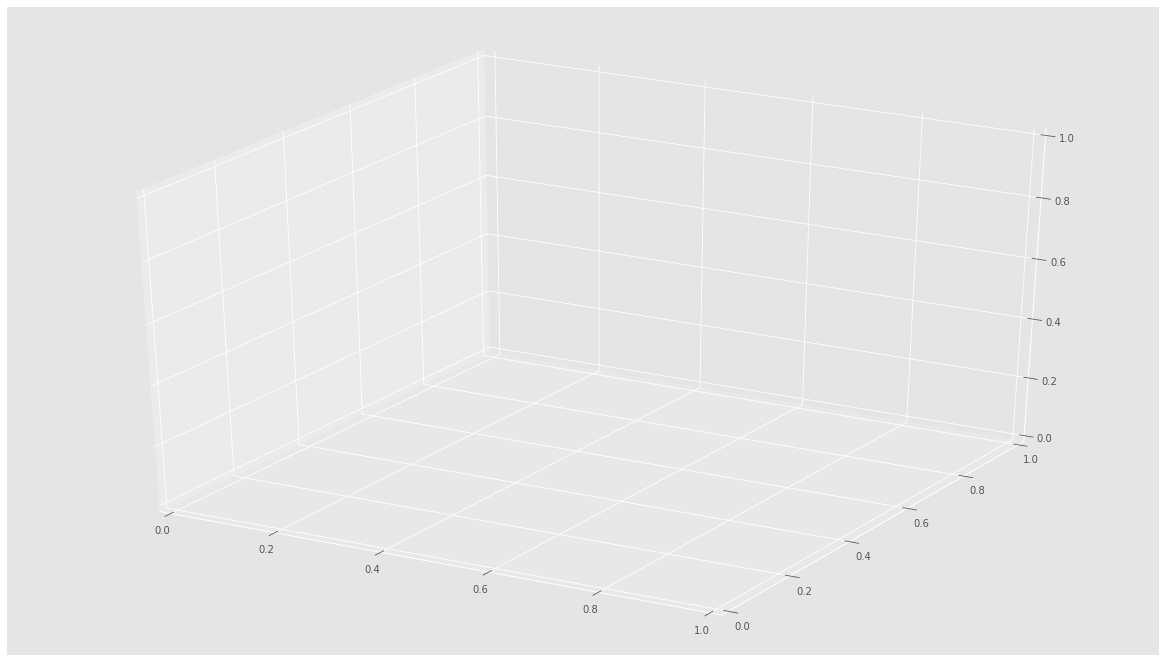

In [1137]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
X[:1]

In [170]:
X_new = np.array(X[1:20]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0]


In [985]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [986]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [987]:
# Create logistic regression object
clf = LogisticRegression(random_state=0)

In [988]:
# Train model
model = clf.fit(X_std, y)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [989]:
# Create new observation
new_observation = X[:1]

In [990]:
# Predict class
model.predict(new_observation)

array([1])

In [997]:
model.score(X_test, y_test)

0.4270353302611367

In [991]:
# View predicted probabilities
model.predict_proba(new_observation)

array([[0., 1.]])

In [999]:
from sklearn.linear_model import LinearRegression


In [1000]:
# Create linear regression
regr = LinearRegression()

# Fit the linear regression
model = regr.fit(X, y)

In [1002]:
model.score(X, y)


0.03524135594838085